# Basic Analysis

In this part, a basic analysis of the bibliographical information is done. The term 'basic'  refers to analyses that can be made by executing queries over a field of the dataframe.

In [1]:
import pandas as pd

In [2]:
records = pd.read_json('demo-keywords.json', orient='records', lines=True)

## Number of documents per document type

In [3]:
from techMiner import documentsByTerm

In [4]:
documentsByTerm(records, 'Document Type')

,Document Type,Num Documents
0,Article,72
2,Conference Paper,72
1,Book Chapter,5
5,Review,5
3,Conference Review,1
4,Note,1


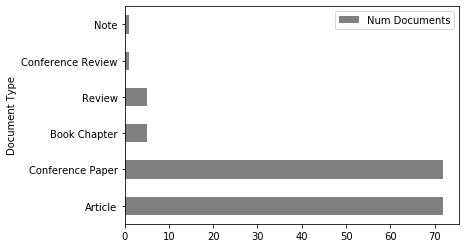

In [5]:
documentsByTerm(records, 'Document Type').plot.barh('Document Type', 'Num Documents', color='gray');

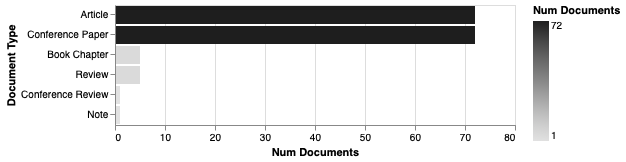

In [6]:
from techMiner import alt_barh_graph
alt_barh_graph(documentsByTerm(records, 'Document Type'))

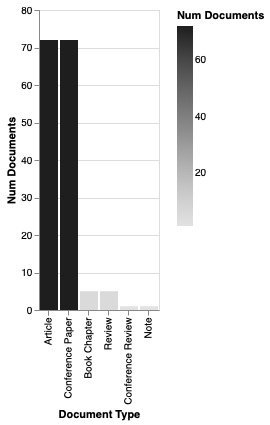

In [7]:
from techMiner import alt_bar_graph
alt_bar_graph(documentsByTerm(records, 'Document Type'))

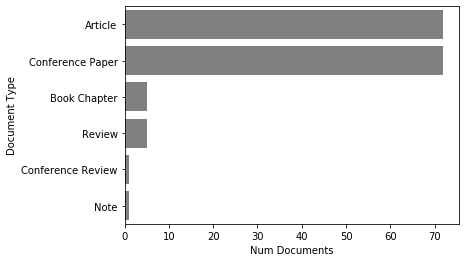

In [8]:
from techMiner import sns_barh_plot
sns_barh_plot(documentsByTerm(records, 'Document Type'));

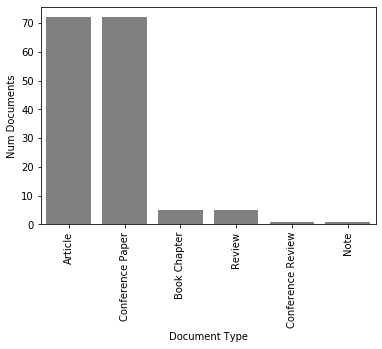

In [9]:
from techMiner import sns_bar_plot
sns_bar_plot(documentsByTerm(records, 'Document Type'));

## Citations per document

In [10]:
documentsByTerm(records, 'Cited by')

,Cited by,Num Documents
0,0,61
1,1,16
2,2,12
3,3,10
7,7,10
4,4,9
5,5,6
6,6,5
10,11,4
9,9,3


## Number of authors per document

In [11]:
records['Num Authors'] = records['Author(s) ID'].map(lambda x: len(x.split(';')))
documentsByTerm(records, 'Num Authors')

,Num Authors,Num Documents
1,2,54
2,3,41
3,4,24
0,1,21
4,5,11
5,6,5


## Number of documents per source title

In [12]:
documentsByTerm(records, 'Source title')

,Source title,Num Documents
75,Lecture Notes in Computer Science (including s...,17
41,Expert Systems with Applications,9
97,Quantitative Finance,9
26,Communications in Computer and Information Sci...,4
29,Computational Economics,3
95,Proceedings of the International Joint Confere...,3
53,IEEE Transactions on Neural Networks and Learn...,3
19,Applied Soft Computing Journal,3
30,Computational Intelligence,2
100,Studies in Computational Intelligence,2


## Number of documents per author

In [13]:
documentsByTerm(records, 'Authors', sep=',')

,Authors,Num Documents
195,Maringer D.,5
213,Ng W.L.,4
205,Montana G.,4
141,Kablan A.,4
14,Arévalo A.,3
144,Kanniainen J.,3
71,Debenham J.,3
345,Zhang J.,3
132,Iosifidis A.,3
327,Wang F.,3


## Number of documents per keyword

In [14]:
documentsByTerm(records, 'Keywords', sep=';')

,Keywords,Num Documents
9,Algorithmic trading,37
123,High frequency trading,19
17,Automated trading,15
155,Machine learning,13
55,Deep learning,11
258,Technical analysis,9
327,multiagent systems,7
86,Financial forecasting,6
18,Automated trading system,6
96,Forecasting,5


## Documents per country

In [15]:
from techMiner import extractCountries

In [16]:
records['Country'] = records['Affiliations'].map(lambda x: extractCountries(x))
documentsByTerm(records, 'Country', sep=';')

,Country,Num Documents
46,United Kingdom,42
8,China,36
47,United States,26
5,Brazil,12
21,Italy,10
15,Germany,9
6,Canada,8
9,Colombia,8
38,Spain,7
41,Switzerland,6


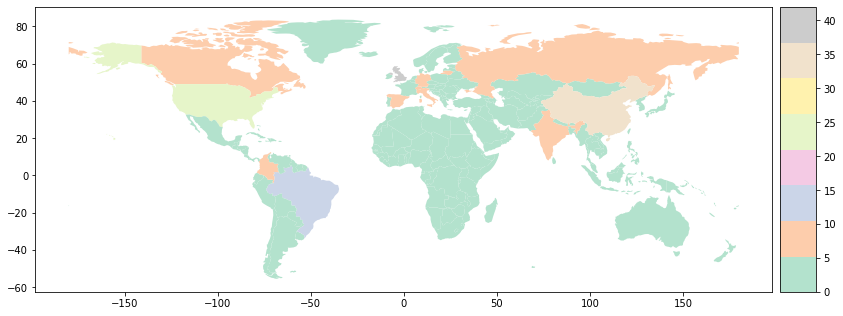

In [18]:
from techMiner import worldmap
worldmap(documentsByTerm(records, 'Country', sep=';'))

## Number of documents per year

In [19]:
from techMiner import documentsByYear
documentsByYear(records)

,Year,Num Documents
1994,1994,1
1995,1995,0
1996,1996,0
1997,1997,0
1998,1998,0
1999,1999,0
2000,2000,0
2001,2001,0
2002,2002,0
2003,2003,2


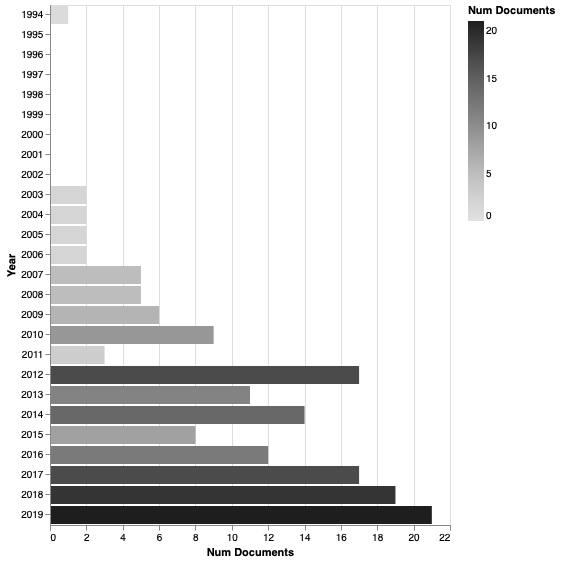

In [20]:
alt_barh_graph(documentsByYear(records))

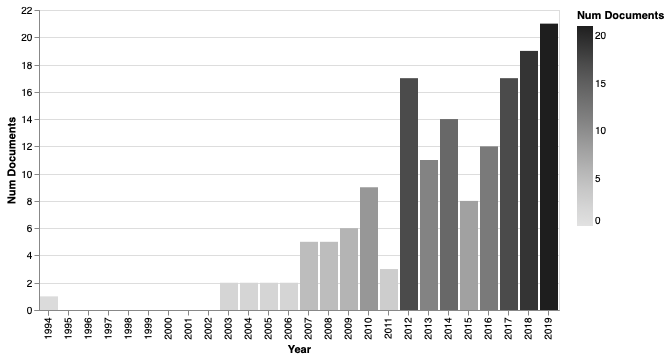

In [21]:
alt_bar_graph(documentsByYear(records))

In [22]:
documentsByYear(records, cumulative=True)

,Year,Num Documents
1994,1994,1
1995,1995,1
1996,1996,1
1997,1997,1
1998,1998,1
1999,1999,1
2000,2000,1
2001,2001,1
2002,2002,1
2003,2003,3


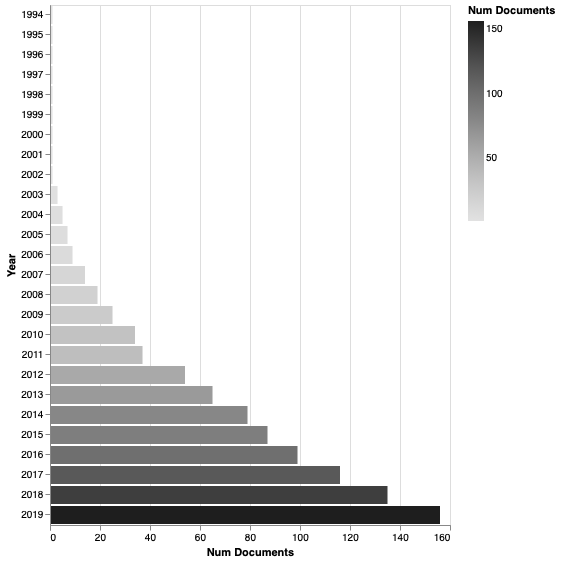

In [23]:
alt_barh_graph(documentsByYear(records, cumulative=True))

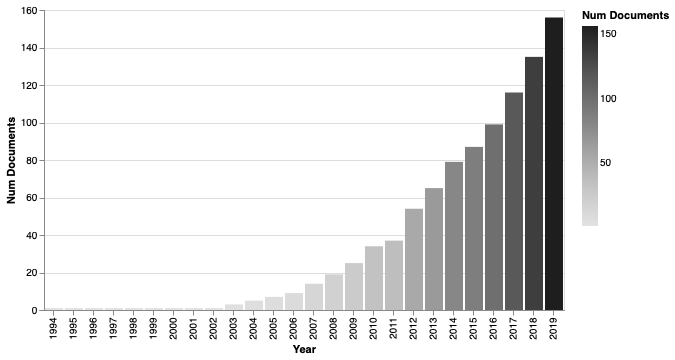

In [24]:
alt_bar_graph(documentsByYear(records, cumulative=True))

## Citations per year

In [25]:
from techMiner import citationsByYear
citationsByYear(records)

,Year,Cited by
1994,1994,3
1995,1995,0
1996,1996,0
1997,1997,0
1998,1998,0
1999,1999,0
2000,2000,0
2001,2001,0
2002,2002,0
2003,2003,49


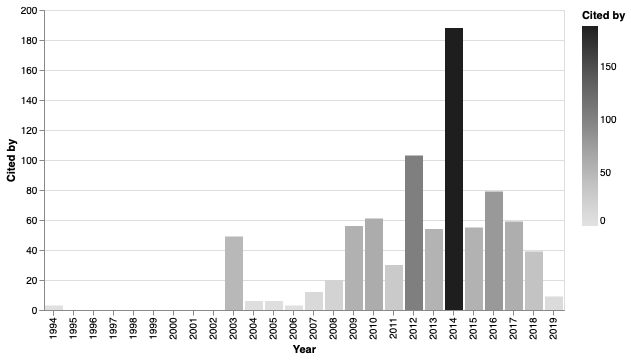

In [26]:
alt_bar_graph(citationsByYear(records))

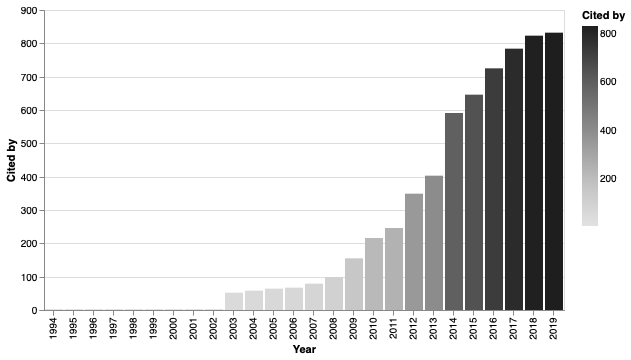

In [27]:
alt_bar_graph(citationsByYear(records, cumulative=True))

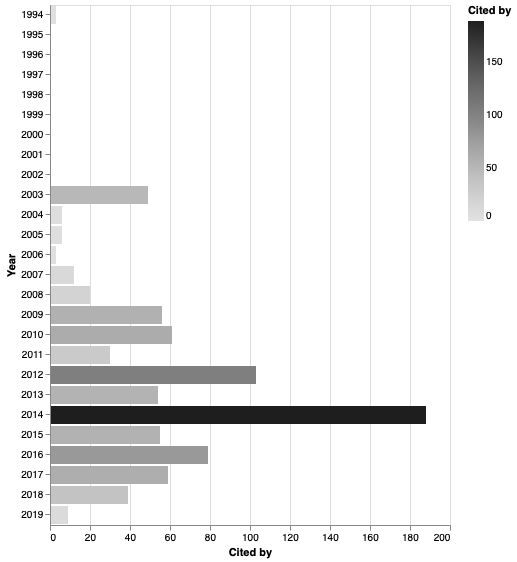

In [28]:
alt_barh_graph(citationsByYear(records))

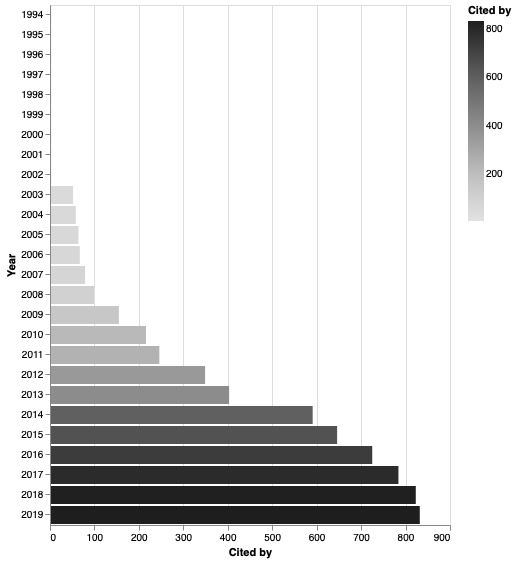

In [29]:
alt_barh_graph(citationsByYear(records, cumulative=True))